<a href="https://colab.research.google.com/github/jason-zl190/deeplearning/blob/master/MyResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#tf.enable_eager_execution()

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Model

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

TensorFlow 2.x selected.


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/1.1.0. Subsequent calls will reuse this data.


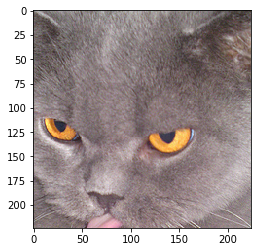

In [2]:
ds = tfds.load('oxford_iiit_pet')
dim = tf.constant([224, 224], dtype=tf.int32)
batch_size = 20
num_epochs = 5
ds_train = ds['train'].map(lambda ele: (tf.image.resize_with_crop_or_pad(ele['image'], 224, 224), ele['label']))
ds_train = ds_train.map(lambda x, y: (tf.divide(tf.cast(x, tf.float32), 255), y))
ds_train = ds_train.shuffle(buffer_size = 10 * batch_size).repeat(num_epochs).batch(batch_size)
ds_test = ds['test'].map(lambda ele: (tf.image.resize_with_crop_or_pad(ele['image'], 224, 224), ele['label']))
ds_test = ds_test.map(lambda x, y: (tf.divide(tf.cast(x, tf.float32), 255), y))
ds_test = ds_test.shuffle(buffer_size = 10 * batch_size).repeat(num_epochs).batch(batch_size)

# # ds_train = ds_train.batch(4)

for x,y in ds_train: break
plt.imshow(x[0].numpy())

In [0]:
class MyResnet50(tf.keras.Model):
  def __init__(self, kernel_size):
    super(MyResnet50, self).__init__(name='')
    
    self.conv1 = tf.keras.layers.Conv2D(64, 7, 2)
    self.maxpool = tf.keras.layers.MaxPooling2D(3, 2)
    # conv2_1
    filters1, filters2, filters3 = 64, 64, 256
    stride = 1
    self.conv21a = tf.keras.layers.Conv2D(filters1, (1, 1), stride)
    self.bn21a = tf.keras.layers.BatchNormalization()
    self.conv21b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn21b = tf.keras.layers.BatchNormalization()
    self.conv21c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn21c = tf.keras.layers.BatchNormalization()
    self.x21_append = tf.keras.layers.Conv2D(filters3, 1, stride, padding='same', use_bias=False)
    self.bn_x21 = tf.keras.layers.BatchNormalization()

    # conv2_2
    filters1, filters2, filters3 = 64, 64, 256
    stride = 1
    self.conv22a = tf.keras.layers.Conv2D(filters1, (1, 1), stride)
    self.bn22a = tf.keras.layers.BatchNormalization()
    self.conv22b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn22b = tf.keras.layers.BatchNormalization()
    self.conv22c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn22c = tf.keras.layers.BatchNormalization()
    self.x22_append = tf.keras.layers.Conv2D(filters3, 1, stride, padding='same', use_bias=False)
    self.bn_x22 = tf.keras.layers.BatchNormalization()

    # conv2_3
    filters1, filters2, filters3 = 64, 64, 256
    stride = 1
    self.conv23a = tf.keras.layers.Conv2D(filters1, (1, 1), stride)
    self.bn23a = tf.keras.layers.BatchNormalization()
    self.conv23b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn23b = tf.keras.layers.BatchNormalization()
    self.conv23c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn23c = tf.keras.layers.BatchNormalization()
    self.x23_append = tf.keras.layers.Conv2D(filters3, 1, stride, padding='same', use_bias=False)
    self.bn_x23 = tf.keras.layers.BatchNormalization()


    # conv3_1
    filters1, filters2, filters3 = 128, 128, 512
    stride = 2
    self.conv31a = tf.keras.layers.Conv2D(filters1, (1, 1), stride)
    self.bn31a = tf.keras.layers.BatchNormalization()
    self.conv31b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn31b = tf.keras.layers.BatchNormalization()
    self.conv31c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn31c = tf.keras.layers.BatchNormalization()
    self.x31_append = tf.keras.layers.Conv2D(filters3, 1, stride, padding='same', use_bias=False)
    self.bn_x31 = tf.keras.layers.BatchNormalization()

    # conv3_2
    filters1, filters2, filters3 = 128, 128, 512
    stride = 1
    self.conv32a = tf.keras.layers.Conv2D(filters1, (1, 1), stride)
    self.bn32a = tf.keras.layers.BatchNormalization()
    self.conv32b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn32b = tf.keras.layers.BatchNormalization()
    self.conv32c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn32c = tf.keras.layers.BatchNormalization()
    self.x32_append = tf.keras.layers.Conv2D(filters3, 1, stride, padding='same', use_bias=False)
    self.bn_x32 = tf.keras.layers.BatchNormalization()


    # conv3_3
    filters1, filters2, filters3 = 128, 128, 512
    stride = 1
    self.conv33a = tf.keras.layers.Conv2D(filters1, (1, 1), stride)
    self.bn33a = tf.keras.layers.BatchNormalization()
    self.conv33b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn33b = tf.keras.layers.BatchNormalization()
    self.conv33c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn33c = tf.keras.layers.BatchNormalization()
    self.x33_append = tf.keras.layers.Conv2D(filters3, 1, stride, padding='same', use_bias=False)
    self.bn_x33 = tf.keras.layers.BatchNormalization()

    # conv3_4
    filters1, filters2, filters3 = 128, 128, 512
    stride = 1
    self.conv34a = tf.keras.layers.Conv2D(filters1, (1, 1), stride)
    self.bn34a = tf.keras.layers.BatchNormalization()
    self.conv34b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn34b = tf.keras.layers.BatchNormalization()
    self.conv34c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn34c = tf.keras.layers.BatchNormalization()
    self.x34_append = tf.keras.layers.Conv2D(filters3, 1, stride, padding='same', use_bias=False)
    self.bn_x34 = tf.keras.layers.BatchNormalization()

    # conv4_1
    filters1, filters2, filters3 = 256, 256, 1024
    stride = 2
    self.conv41a = tf.keras.layers.Conv2D(filters1, (1, 1), stride)
    self.bn41a = tf.keras.layers.BatchNormalization()
    self.conv41b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn41b = tf.keras.layers.BatchNormalization()
    self.conv41c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn41c = tf.keras.layers.BatchNormalization()
    self.x41_append = tf.keras.layers.Conv2D(filters3, 1, stride, padding='same', use_bias=False)
    self.bn_x41 = tf.keras.layers.BatchNormalization()

    # conv4_2
    filters1, filters2, filters3 = 256, 256, 1024
    stride = 1
    self.conv42a = tf.keras.layers.Conv2D(filters1, (1, 1), stride)
    self.bn42a = tf.keras.layers.BatchNormalization()
    self.conv42b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn42b = tf.keras.layers.BatchNormalization()
    self.conv42c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn42c = tf.keras.layers.BatchNormalization()
    self.x42_append = tf.keras.layers.Conv2D(filters3, 1, stride, padding='same', use_bias=False)
    self.bn_x42 = tf.keras.layers.BatchNormalization()

    # conv4_3
    filters1, filters2, filters3 = 256, 256, 1024
    stride = 1
    self.conv43a = tf.keras.layers.Conv2D(filters1, (1, 1), stride)
    self.bn43a = tf.keras.layers.BatchNormalization()
    self.conv43b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn43b = tf.keras.layers.BatchNormalization()
    self.conv43c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn43c = tf.keras.layers.BatchNormalization()
    self.x43_append = tf.keras.layers.Conv2D(filters3, 1, stride, padding='same', use_bias=False)
    self.bn_x43 = tf.keras.layers.BatchNormalization()

    # conv4_4
    filters1, filters2, filters3 = 256, 256, 1024
    stride = 1
    self.conv44a = tf.keras.layers.Conv2D(filters1, (1, 1), stride)
    self.bn44a = tf.keras.layers.BatchNormalization()
    self.conv44b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn44b = tf.keras.layers.BatchNormalization()
    self.conv44c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn44c = tf.keras.layers.BatchNormalization()
    self.x44_append = tf.keras.layers.Conv2D(filters3, 1, stride, padding='same', use_bias=False)
    self.bn_x44 = tf.keras.layers.BatchNormalization()

    # conv4_5
    filters1, filters2, filters3 = 256, 256, 1024
    stride = 1
    self.conv45a = tf.keras.layers.Conv2D(filters1, (1, 1), stride)
    self.bn45a = tf.keras.layers.BatchNormalization()
    self.conv45b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn45b = tf.keras.layers.BatchNormalization()
    self.conv45c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn45c = tf.keras.layers.BatchNormalization()
    self.x45_append = tf.keras.layers.Conv2D(filters3, 1, stride, padding='same', use_bias=False)
    self.bn_x45 = tf.keras.layers.BatchNormalization()

    # conv4_6
    filters1, filters2, filters3 = 256, 256, 1024
    stride = 1
    self.conv46a = tf.keras.layers.Conv2D(filters1, (1, 1), stride)
    self.bn46a = tf.keras.layers.BatchNormalization()
    self.conv46b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn46b = tf.keras.layers.BatchNormalization()
    self.conv46c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn46c = tf.keras.layers.BatchNormalization()
    self.x46_append = tf.keras.layers.Conv2D(filters3, 1, stride, padding='same', use_bias=False)
    self.bn_x46 = tf.keras.layers.BatchNormalization()

    # conv5_1
    filters1, filters2, filters3 = 512, 512, 2048
    stride = 2
    self.conv51a = tf.keras.layers.Conv2D(filters1, (1, 1), stride)
    self.bn51a = tf.keras.layers.BatchNormalization()
    self.conv51b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn51b = tf.keras.layers.BatchNormalization()
    self.conv51c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn51c = tf.keras.layers.BatchNormalization()
    self.x51_append = tf.keras.layers.Conv2D(filters3, 1, stride, padding='same', use_bias=False)
    self.bn_x51 = tf.keras.layers.BatchNormalization()

    # conv5_2
    filters1, filters2, filters3 = 512, 512, 2048
    stride = 1
    self.conv52a = tf.keras.layers.Conv2D(filters1, (1, 1), stride)
    self.bn52a = tf.keras.layers.BatchNormalization()
    self.conv52b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn52b = tf.keras.layers.BatchNormalization()
    self.conv52c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn52c = tf.keras.layers.BatchNormalization()
    self.x52_append = tf.keras.layers.Conv2D(filters3, 1, stride, padding='same', use_bias=False)
    self.bn_x52 = tf.keras.layers.BatchNormalization()

    # conv5_3
    filters1, filters2, filters3 = 512, 512, 2048
    stride = 1
    self.conv53a = tf.keras.layers.Conv2D(filters1, (1, 1), stride)
    self.bn53a = tf.keras.layers.BatchNormalization()
    self.conv53b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn53b = tf.keras.layers.BatchNormalization()
    self.conv53c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn53c = tf.keras.layers.BatchNormalization()
    self.x53_append = tf.keras.layers.Conv2D(filters3, 1, stride, padding='same', use_bias=False)
    self.bn_x53 = tf.keras.layers.BatchNormalization()

    self.avgpool = tf.keras.layers.AvgPool2D(3, 2)
    self.flatten = tf.keras.layers.Flatten()
    self.dense = tf.keras.layers.Dense(37, activation='softmax')

  def call(self, input_tensor, training=False):
    input_tensor = self.conv1(input_tensor)
    input_tensor = self.maxpool(input_tensor)
    
    # conv2_1
    x = self.conv21a(input_tensor)
    x = self.bn21a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv21b(x)
    x = self.bn21b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv21c(x)
    x = self.bn21c(x, training=training)
    x_append = self.x21_append(input_tensor)
    x_append = self.bn_x21(x_append)
    x += x_append
    x = tf.nn.relu(x)

    # conv2_2
    x = self.conv22a(input_tensor)
    x = self.bn22a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv22b(x)
    x = self.bn22b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv22c(x)
    x = self.bn22c(x, training=training)
    x_append = self.x22_append(input_tensor)
    x_append = self.bn_x22(x_append)
    x += x_append
    x = tf.nn.relu(x)

    # conv2_3
    x = self.conv23a(input_tensor)
    x = self.bn23a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv23b(x)
    x = self.bn23b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv23c(x)
    x = self.bn23c(x, training=training)
    x_append = self.x23_append(input_tensor)
    x_append = self.bn_x23(x_append)
    x += x_append
    x = tf.nn.relu(x)


    # conv3_1
    x = self.conv31a(input_tensor)
    x = self.bn31a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv31b(x)
    x = self.bn31b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv31c(x)
    x = self.bn31c(x, training=training)
    x_append = self.x31_append(input_tensor)
    x_append = self.bn_x31(x_append)
    x += x_append
    x = tf.nn.relu(x)

    # conv3_2
    x = self.conv32a(input_tensor)
    x = self.bn32a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv32b(x)
    x = self.bn32b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv32c(x)
    x = self.bn32c(x, training=training)
    x_append = self.x32_append(input_tensor)
    x_append = self.bn_x32(x_append)
    x += x_append
    x = tf.nn.relu(x)

    # conv3_3
    x = self.conv33a(input_tensor)
    x = self.bn33a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv33b(x)
    x = self.bn33b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv33c(x)
    x = self.bn33c(x, training=training)
    x_append = self.x33_append(input_tensor)
    x_append = self.bn_x33(x_append)
    x += x_append
    x = tf.nn.relu(x)


    # conv3_4
    x = self.conv34a(input_tensor)
    x = self.bn34a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv34b(x)
    x = self.bn34b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv34c(x)
    x = self.bn34c(x, training=training)
    x_append = self.x34_append(input_tensor)
    x_append = self.bn_x34(x_append)
    x += x_append
    x = tf.nn.relu(x)

    # conv4_1
    x = self.conv41a(input_tensor)
    x = self.bn41a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv41b(x)
    x = self.bn41b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv41c(x)
    x = self.bn41c(x, training=training)
    x_append = self.x41_append(input_tensor)
    x_append = self.bn_x41(x_append)
    x += x_append
    x = tf.nn.relu(x)

    # conv4_2
    x = self.conv42a(input_tensor)
    x = self.bn42a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv42b(x)
    x = self.bn42b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv42c(x)
    x = self.bn42c(x, training=training)
    x_append = self.x42_append(input_tensor)
    x_append = self.bn_x42(x_append)
    x += x_append
    x = tf.nn.relu(x)


    # conv4_3
    x = self.conv43a(input_tensor)
    x = self.bn43a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv43b(x)
    x = self.bn43b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv43c(x)
    x = self.bn43c(x, training=training)
    x_append = self.x43_append(input_tensor)
    x_append = self.bn_x43(x_append)
    x += x_append
    x = tf.nn.relu(x)

    # conv4_4
    x = self.conv44a(input_tensor)
    x = self.bn44a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv44b(x)
    x = self.bn44b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv44c(x)
    x = self.bn44c(x, training=training)
    x_append = self.x44_append(input_tensor)
    x_append = self.bn_x44(x_append)
    x += x_append
    x = tf.nn.relu(x)

    # conv4_5
    x = self.conv45a(input_tensor)
    x = self.bn45a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv45b(x)
    x = self.bn45b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv45c(x)
    x = self.bn45c(x, training=training)
    x_append = self.x45_append(input_tensor)
    x_append = self.bn_x45(x_append)
    x += x_append
    x = tf.nn.relu(x)

    # conv4_6
    x = self.conv46a(input_tensor)
    x = self.bn46a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv46b(x)
    x = self.bn46b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv46c(x)
    x = self.bn46c(x, training=training)
    x_append = self.x46_append(input_tensor)
    x_append = self.bn_x46(x_append)
    x += x_append
    x = tf.nn.relu(x)

    # conv5_1
    x = self.conv51a(input_tensor)
    x = self.bn51a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv51b(x)
    x = self.bn51b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv51c(x)
    x = self.bn51c(x, training=training)
    x_append = self.x51_append(input_tensor)
    x_append = self.bn_x51(x_append)
    x += x_append
    x = tf.nn.relu(x)

    # conv5_2
    x = self.conv52a(input_tensor)
    x = self.bn52a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv52b(x)
    x = self.bn52b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv52c(x)
    x = self.bn52c(x, training=training)
    x_append = self.x52_append(input_tensor)
    x_append = self.bn_x52(x_append)
    x += x_append
    x = tf.nn.relu(x)

    # conv5_3
    x = self.conv53a(input_tensor)
    x = self.bn53a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv53b(x)
    x = self.bn53b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv53c(x)
    x = self.bn53c(x, training=training)
    x_append = self.x53_append(input_tensor)
    x_append = self.bn_x53(x_append)
    x += x_append
    x = tf.nn.relu(x)

    x = self.avgpool(x)
    x = self.flatten(x)
    x = self.dense(x)
    return x

model = MyResnet50(3)
sgd = tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model(x)

<tf.Tensor: id=5724, shape=(20, 37), dtype=float32, numpy=
array([[0.02785268, 0.02627504, 0.02623416, 0.02751577, 0.02420158,
        0.02715154, 0.02845594, 0.02611607, 0.02964401, 0.02701067,
        0.02705694, 0.02823051, 0.02693484, 0.02762177, 0.02750903,
        0.02683582, 0.02631752, 0.02657405, 0.02585008, 0.02629131,
        0.02746912, 0.02985195, 0.02767068, 0.02683142, 0.02853633,
        0.02652657, 0.02777364, 0.02611051, 0.02625499, 0.02695627,
        0.02690592, 0.02705639, 0.02662504, 0.02600047, 0.02725115,
        0.02596614, 0.02653399],
       [0.02732721, 0.02582203, 0.02561778, 0.02753114, 0.02435141,
        0.02783291, 0.02805736, 0.0256797 , 0.02883232, 0.02667422,
        0.02686947, 0.02848586, 0.02676485, 0.02825089, 0.02773972,
        0.02806584, 0.02603178, 0.02614945, 0.02701773, 0.02650367,
        0.02716201, 0.02952257, 0.02717087, 0.02658651, 0.02798716,
        0.02734734, 0.0275194 , 0.0262087 , 0.02630735, 0.02738509,
        0.0267098 , 0.02

In [5]:
model.summary()

Model: "my_resnet50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  4160      
_________________________________________________________________
batch_normalization (BatchNo multiple                  256       
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  36928     
_________________________________________________________________
batch_normalization_1 (Batch multiple                  256       
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  

In [0]:
history = model.fit(ds_train, validation_data=ds_test, epochs=num_epochs)
eva = model.evaluate(ds_test)

Epoch 1/5


920/920 [==============================] - 1842s 2s/step - loss: 6.0180 - accuracy: 0.2077 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
917/918 [============================>.] - ETA: 1s - loss: 1.2679 - accuracy: 0.6523

In [0]:
np.argmax(model.predict(x)[0])

In [0]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(len(loss))

import matplotlib.pyplot as plt
plt.plot(epochs, loss, color='blue')
plt.plot(epochs, val_loss, color='orange')